In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
DATA_DIR = 'C:/Users/Ujjwal/Documents/Data_1/Data_science/PetImages'
CATEGORIES = ['Cat','Dog']

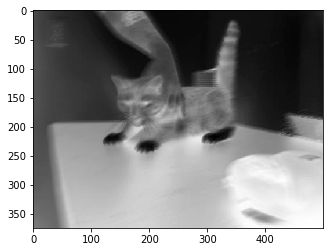

[[167 167 168 ... 204 203 202]
 [167 167 168 ... 204 203 203]
 [167 167 168 ... 205 204 203]
 ...
 [124 124 124 ...   2   2   2]
 [123 123 123 ...   1   1   1]
 [122 122 123 ...   1   1   1]]


In [3]:
for category in CATEGORIES:
    path = os.path.join(DATA_DIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap=plt.cm.binary)
        plt.show()
        print(img_array)
        break
    break

In [4]:
img_array.shape

(375, 500)

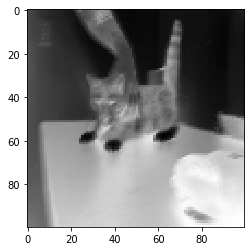

[[168 173 178 ... 211 208 204]
 [168 173 178 ... 213 209 206]
 [169 174 177 ... 215 211 208]
 ...
 [128 129 131 ...   3   3   2]
 [126 128 130 ...   3   3   3]
 [123 125 129 ...   1   1   1]]


In [5]:
a = cv2.resize(img_array,(100,100))
plt.imshow(a,cmap=plt.cm.binary)
plt.show()
print(a)

In [6]:
a = CATEGORIES.index('Dog')
a

1

In [7]:
def create_training_data():
    training_data = []
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR,category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_img_array = cv2.resize(img_array,(100,100))
                training_data.append([new_img_array, CATEGORIES.index(category)])
            except:
                pass
            
            
    return training_data

In [8]:
data = create_training_data()

In [9]:
data[0]

[array([[168, 173, 178, ..., 211, 208, 204],
        [168, 173, 178, ..., 213, 209, 206],
        [169, 174, 177, ..., 215, 211, 208],
        ...,
        [128, 129, 131, ...,   3,   3,   2],
        [126, 128, 130, ...,   3,   3,   3],
        [123, 125, 129, ...,   1,   1,   1]], dtype=uint8), 0]

In [10]:
import random
random.shuffle(data)

In [11]:
X = []
y = []
for pixel, label in data:
    X.append(pixel)
    y.append(label)

In [12]:
X[0]

array([[247, 244, 248, ..., 255, 255, 255],
       [254, 159,   9, ..., 255, 255, 255],
       [253, 152,  11, ..., 255, 255, 255],
       ...,
       [254, 165,  44, ...,  61, 168, 253],
       [251, 157,  53, ...,  63, 165, 254],
       [248, 210, 161, ..., 169, 208, 251]], dtype=uint8)

In [13]:
# Changed list into suitable array
X = np.array(X).reshape(-1,100,100,1)

In [14]:
import pickle

#X-Data
pickle_out = open("X.pickle",'wb')
pickle.dump(X,pickle_out)
pickle_out.close()

#y_Data
pickle_out = open("y.pickle",'wb')
pickle.dump(y,pickle_out)
pickle_out.close()